In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
from utils.utils import Vectorizer
from lms.models import FFNLM

In [3]:
texto = 'Juan Santiago Nicolás'
num_embeddings = 4 + len(texto.split(' '))
num_dim = 2
embeddigns = torch.nn.Embedding(
	num_embeddings=num_embeddings,
	embedding_dim=num_dim
)
embeddigns.weight

Parameter containing:
tensor([[ 0.0173,  1.3058],
        [ 0.0843,  0.0497],
        [ 1.1970,  0.3784],
        [ 0.8762, -1.1832],
        [ 0.3406,  1.1823],
        [-0.9573,  0.0197],
        [ 0.0387, -1.6842]], requires_grad=True)

In [4]:
vec = Vectorizer(
	texto=texto,
	embeddings=embeddigns
)
vec.tokens

['<unk>', '<eos>', '<pad>', '<sos>', 'juan', 'nicolás', 'santiago']

In [5]:
window_length = 1
hidden_size = 4
lm = FFNLM(
	vectorizer=vec,
	window_length=window_length,
	hidden_size=hidden_size
)
lm.summary()

+--------------------------+------------+
|         Modules          | Parameters |
+--------------------------+------------+
|        fc1.weight        |     8      |
|         fc1.bias         |     4      |
| fc_intermediate_1.weight |     16     |
|  fc_intermediate_1.bias  |     4      |
| fc_intermediate_2.weight |     16     |
|  fc_intermediate_2.bias  |     4      |
|        fc2.weight        |     28     |
|         fc2.bias         |     7      |
+--------------------------+------------+
Total Trainable Params: 87
Model device: mps


In [6]:
lm.probabilities(['juan'])

tensor([0.1244, 0.0734, 0.1358, 0.1280, 0.2295, 0.1326, 0.1762],
       device='mps:0', grad_fn=<SoftmaxBackward0>)

100%|██████████| 500/500 [00:06<00:00, 82.59it/s]


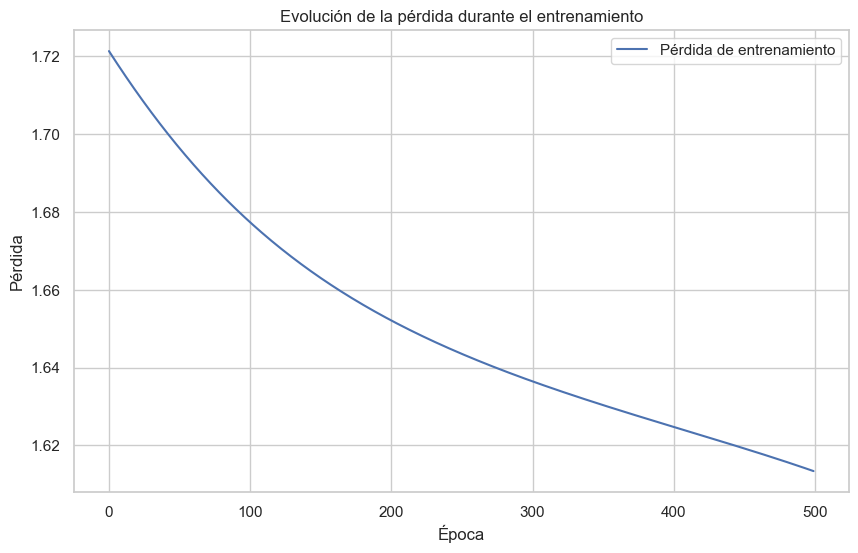

In [13]:
batch_size = 2
parameters = {
	"learning_rate":1e-2,
	"window_length":window_length,
	"batch_size":batch_size,
	"num_epochs":500
}
lm.train(
	texto=texto,
	parametros=parameters
)

In [14]:
texto

'Juan Santiago Nicolás'

In [15]:
lm.probabilities(['juan'])

tensor([0.0057, 0.0033, 0.0072, 0.0060, 0.0134, 0.3237, 0.6407],
       device='mps:0', grad_fn=<SoftmaxBackward0>)

# Ejemplo 2

In [17]:
texto = ' '.join([str(x) for x in range(100)])
texto

'0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99'

# Ejemplo 3

In [ ]:
texto = 'Juan Nicolás Edgar Juan Nicolás Daniel Juan Nicolás Santiago'